In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [2]:
# TODO
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


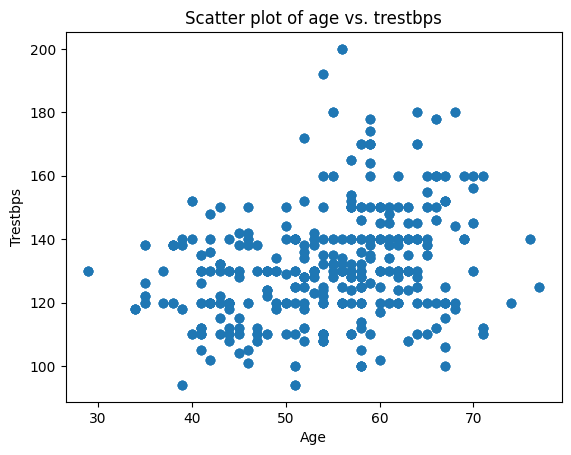

Text(0.5, 1.0, 'Bar chart')

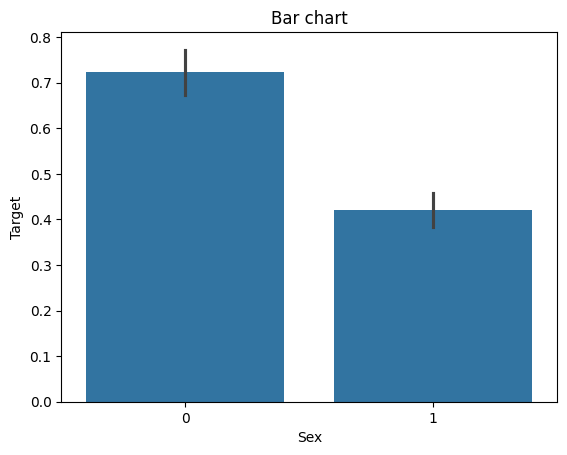

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df['age'], df['trestbps'])
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.title('Scatter plot of age vs. trestbps')
plt.show()

sns.barplot(x='sex', y='target', data=df)
plt.xlabel('Sex')
plt.ylabel('Target')
plt.title('Bar chart')

In [4]:
df['target'].replace(0, -1, inplace=True)

## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [6]:
# TODO
df.shape

(1025, 14)

In [7]:
# This  facilitates comprehension of the data type and related information,
# such as the quantity of records in each column, whether the data is null or
# not, the type of data, and the dataset’s memory use.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# gives the count, mean, standard deviation, minimum, and quartiles for each
# numerical column. The dataset’s central tendencies and spread are briefly summarized.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# This function checks for missing values in each column of the DataFrame ‘df’
# and returns the sum of null values for each column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# This function determines how many unique values there are in each column of
# the DataFrame “df,” offering information about the variety of data that makes
# up each feature.
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

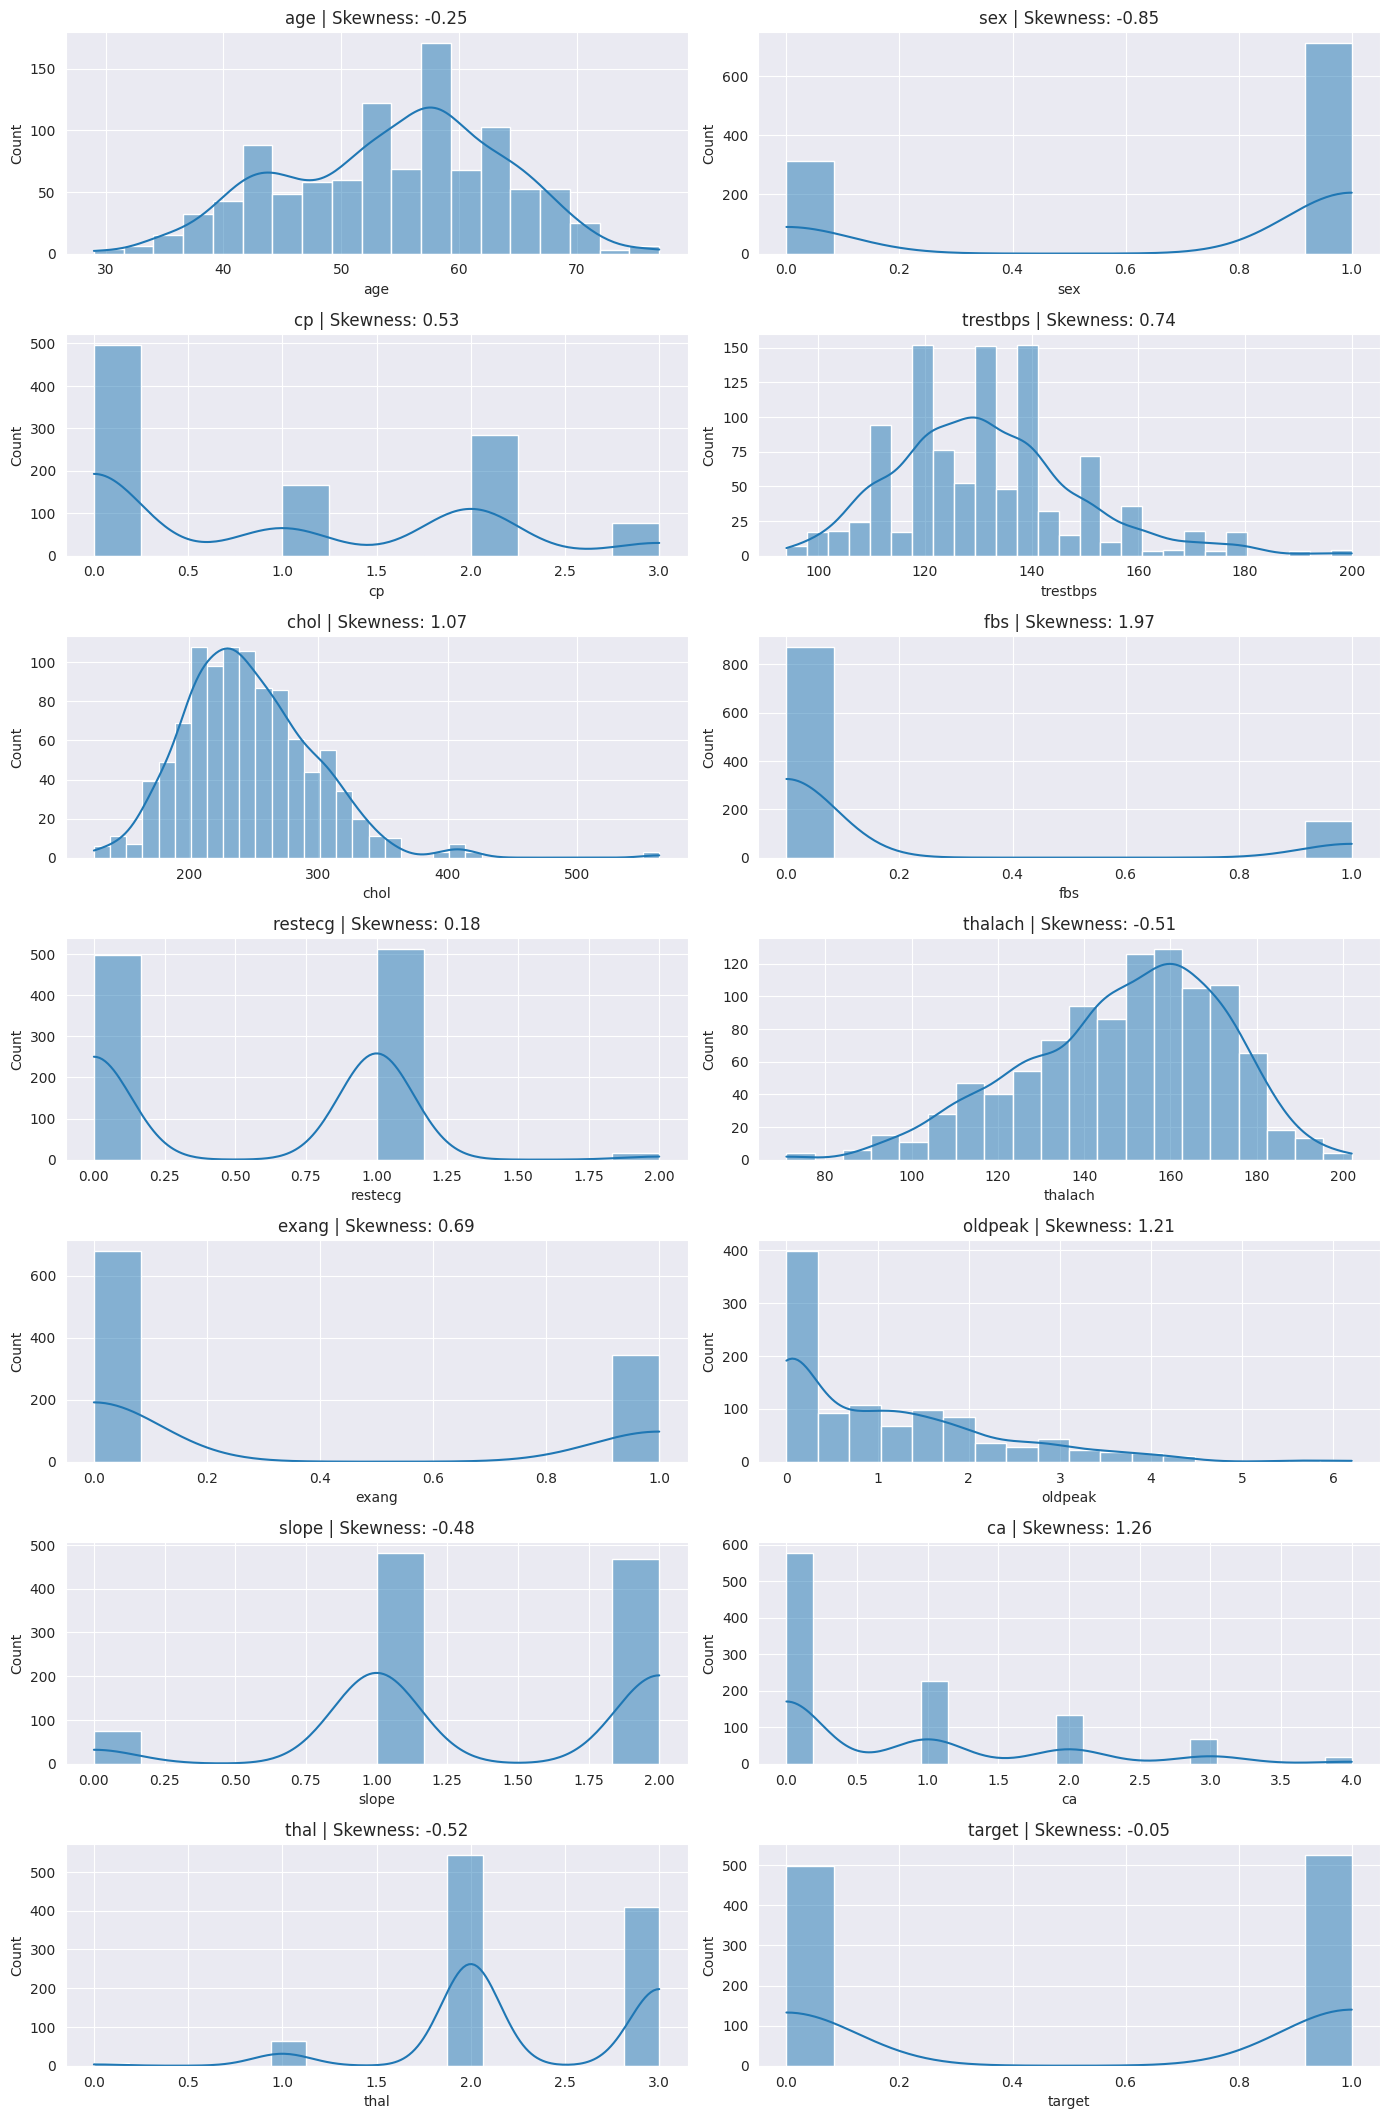

In [11]:
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [12]:
feature_list = [feature for feature in df.columns]
print("There are", len(feature_list), "features found in the data")

There are 14 features found in the data


In [13]:
#Print Discrete Feature Data
discrete_feature = [feature for feature in feature_list if len(df[feature].unique()) < 25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ", discrete_feature)

#Print Continuous Feature Data
cont_feature = [feature for feature in feature_list if len(df[feature].unique()) > 25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ", cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:


$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$


We can write this without the dot product with a sum sign:


$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$


So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [13]:
learning_rate = 0.1
epochs = 5000

In [14]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below
    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate
    '''

    num_samples, num_features = X.shape
    w = np.zeros(num_features)  # Initialize weights to zeros
    for epoch in range(epochs):
        total_loss = 0
        for i in range(num_samples):
            if Y[i] * np.dot(X[i], w) <= 0:  # Misclassification condition
                w = w + learning_rate * Y[i] * X[i]  # Update rule
                total_loss -= np.dot(X[i], w) * Y[i]
        print(f'Epoch {epoch + 1}, Total Loss: {total_loss}')
    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [11]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    num_samples, num_features = X.shape

    w = np.zeros(num_features)
    errors = []

    for epoch in range(epochs):
        total_loss = 0

        for i in range(num_samples):

            if Y[i] * np.dot(X[i], w) <= 0:
                total_loss -= np.dot(X[i], w) * Y[i]
                # total_loss += 1
                w += learning_rate * Y[i] * X[i]


        errors.append(total_loss)

        print(f'Epoch {epoch + 1}, Total Loss: {total_loss}')

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Perceptron SGD Total Loss')
    plt.show()
    return w

In [6]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [7]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.ones((X.shape[0], 1)) * -1

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)


In [8]:
X.shape

(1025, 14)

In [27]:
# TODO: Split the data to train and test with a 0.2 ratio

split_ratio = 0.8
num_samples = X.shape[0]
num_train_samples = int(split_ratio * num_samples)
num_val_samples = num_samples - num_train_samples

indices = np.random.permutation(num_samples)

train_indices = indices[:num_train_samples]
val_indices = indices[num_train_samples:]

X_train, X_val = X[train_indices], X[val_indices]
y_train, y_val = y[train_indices], y[val_indices]

Epoch 1, Total Loss: 1789573.3810000003
Epoch 2, Total Loss: 1763999.4980000008
Epoch 3, Total Loss: 1736927.7030000004
Epoch 4, Total Loss: 1718222.8899999987
Epoch 5, Total Loss: 1677736.2310000001
Epoch 6, Total Loss: 1738947.4729999988
Epoch 7, Total Loss: 1804655.7719999994
Epoch 8, Total Loss: 1699840.5409999993
Epoch 9, Total Loss: 1686158.1490000002
Epoch 10, Total Loss: 1697660.3780000003
Epoch 11, Total Loss: 1687232.1360000004
Epoch 12, Total Loss: 1656949.6330000004
Epoch 13, Total Loss: 1658315.4100000015
Epoch 14, Total Loss: 1647173.23
Epoch 15, Total Loss: 1686589.858000001
Epoch 16, Total Loss: 1630243.9030000006
Epoch 17, Total Loss: 1633609.706000001
Epoch 18, Total Loss: 1600675.9980000015
Epoch 19, Total Loss: 1619888.367000002
Epoch 20, Total Loss: 1583371.337000001
Epoch 21, Total Loss: 1599083.7150000012
Epoch 22, Total Loss: 1608737.1010000026
Epoch 23, Total Loss: 1535849.2190000003
Epoch 24, Total Loss: 1555415.3950000014
Epoch 25, Total Loss: 1566698.5000000

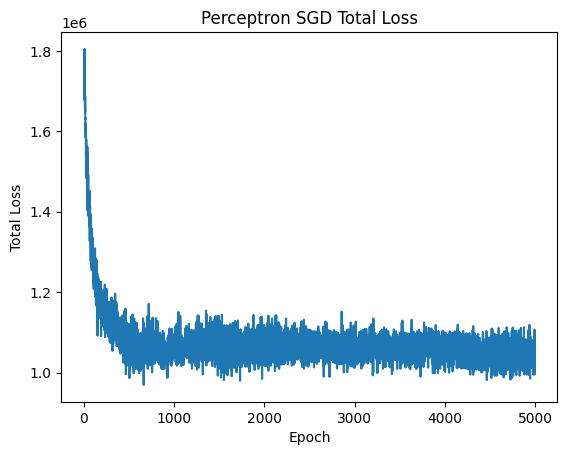

In [28]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [21]:
def accuracy_score(y_true, y_pred):
    #TODO: Your implementation
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions

    return accuracy

Get the accuracy of your model using the function you implemented.

In [22]:
# for x in X_val:
#     print (np.dot(x, w))

In [29]:
# TODO
predictions = []

for x in X_val:
    pred = np.dot(x, w)
    if pred > 0:
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_val, predictions))

0.8634146341463415


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [30]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    num_labels = len(labels)
    matrix = np.zeros((num_labels, num_labels), dtype=int)

    # TODO: Populate the confusion matrix
    for a, p in zip(actual, predicted):
        if a == 1: a = 0
        if p == 1: p = 0
        matrix[a, p] += 1

    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Now plot the confusion matrix for your model:

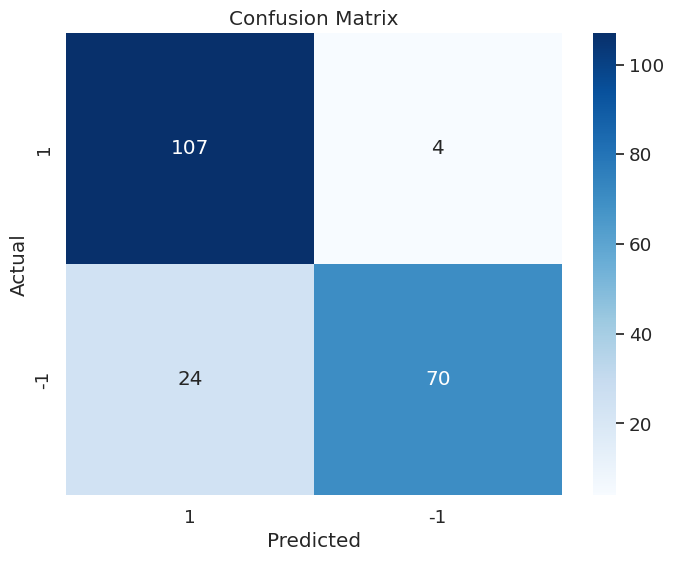

In [32]:
# TODO
labels = [1, -1]
matrix = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(matrix, labels)

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [33]:
def recall_score(cm):
  #TODO: return the recall score
  true_positives = np.diag(cm)
  false_negatives = np.sum(cm, axis=1) - true_positives
  return np.mean(true_positives / (true_positives + false_negatives))


print(recall_score(matrix))

0.8543224075138969


In [34]:
def precision_score(cm):
  #TODO: return the precision score
  true_positives = np.diag(cm)
  false_positives = np.sum(cm, axis=0) - true_positives
  return np.mean(true_positives / (true_positives + false_positives))

print(precision_score(matrix))

0.8813699195378585


In [35]:
def f1_score(cm):
  #TODO: return the f1 score
  recall = recall_score(cm)
  precision = precision_score(cm)
  return 2 * (precision * recall) / (precision + recall)

print(f1_score(matrix))

0.8676354211335526


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [36]:
import numpy as np

class GaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0)
            self.prior[c] = len(X_c) / len(X)

    def _pdf(self, X, mean, var):
        return 1 / np.sqrt(2 * np.pi * var) * np.exp(-(X - mean)**2 / (2 * var))

    def predict(self, X):
        posteriors = []

        for c in self.classes:
            likelihood = np.prod(self._pdf(X, self.mean[c], self.var[c]), axis=1)
            posterior = likelihood * self.prior[c]
            posteriors.append(posterior)

        posteriors = np.array(posteriors).T
        return self.classes[np.argmax(posteriors, axis=1)]


class MultinomialNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_count = {}
        self.feature_count = {}
        self.prior = {}

        for c in self.classes:
            X_c = X[y == c]
            self.class_count[c] = X_c.shape[0]
            self.feature_count[c] = np.sum(X_c, axis=0)
            self.prior[c] = self.class_count[c] / len(y)

    def _compute_log_likelihood(self, X, c):
        numerator = X * np.log((self.feature_count[c] + 1) / (self.class_count[c] + X.shape[1]))
        return np.sum(numerator, axis=1)

    def predict(self, X):
        posteriors = []

        for c in self.classes:
            log_likelihood = self._compute_log_likelihood(X, c)
            posterior = log_likelihood + np.log(self.prior[c])
            posteriors.append(posterior)

        posteriors = np.array(posteriors).T
        return self.classes[np.argmax(posteriors, axis=1)]


class MixedDataNB:
    def __init__(self):
        self.gaussian_nb = GaussianNB()
        self.multinomial_nb = MultinomialNB()

    def fit(self, X, y):
        '''
        TODO: Train moodel using train data

        :param X: data samples as a numpy array
        :param Y: data labels as a numpy array
        '''
        continuous_cols = []
        categorical_cols = []
        for i in range(X.shape[1]):
            if isinstance(X[0, i], str):
                categorical_cols.append(i)
            else:
                continuous_cols.append(i)

        if continuous_cols:
            self.gaussian_nb.fit(X[:, continuous_cols], y)

        if categorical_cols:
            self.multinomial_nb.fit(X[:, categorical_cols], y)

    def predict(self, X):
        '''
        TODO: Predict test data labels

        :param X: data samples as a numpy array
        :return: labels vector as a numpy array
        '''
        continuous_cols = []
        categorical_cols = []
        for i in range(X.shape[1]):
            if isinstance(X[0, i], str):
                categorical_cols.append(i)
            else:
                continuous_cols.append(i)

        continuous_predictions = None
        if continuous_cols:
            continuous_predictions = self.gaussian_nb.predict(X[:, continuous_cols])

        categorical_predictions = None
        if categorical_cols:
            categorical_predictions = self.multinomial_nb.predict(X[:, categorical_cols])

        if continuous_cols and categorical_cols:
            predictions = np.vstack((continuous_predictions, categorical_predictions)).T
        elif continuous_cols:
            predictions = continuous_predictions.reshape(-1, 1)
        elif categorical_cols:
            predictions = categorical_predictions.reshape(-1, 1)
        else:
            raise ValueError("No features provided")
        return predictions

## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [37]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [43]:
# TODO

split_ratio = 0.8
num_samples = X.shape[0]
num_train_samples = int(split_ratio * num_samples)
num_val_samples = num_samples - num_train_samples

indices = np.random.permutation(num_samples)

train_indices = indices[:num_train_samples]
val_indices = indices[num_train_samples:]

X_train, X_val = X[train_indices], X[val_indices]
y_train, y_val = y[train_indices], y[val_indices]

### Model training

In [44]:
# TODO
mixed_data_nb = MixedDataNB()
mixed_data_nb.fit(X_train, y_train)

### Make predictions

In [45]:
# TODO
predictions = mixed_data_nb.predict(X_val).flatten()

In [46]:
print(predictions)

[-1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1 -1  1  1 -1  1
 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1
 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1
 -1 -1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1  1 -1  1
  1  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1 -1
 -1  1  1  1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1
 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1]


### Accuracy

Get the accuracy of your model using the function you implemented.

In [47]:
print(accuracy_score(y_val, predictions))

0.8536585365853658


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

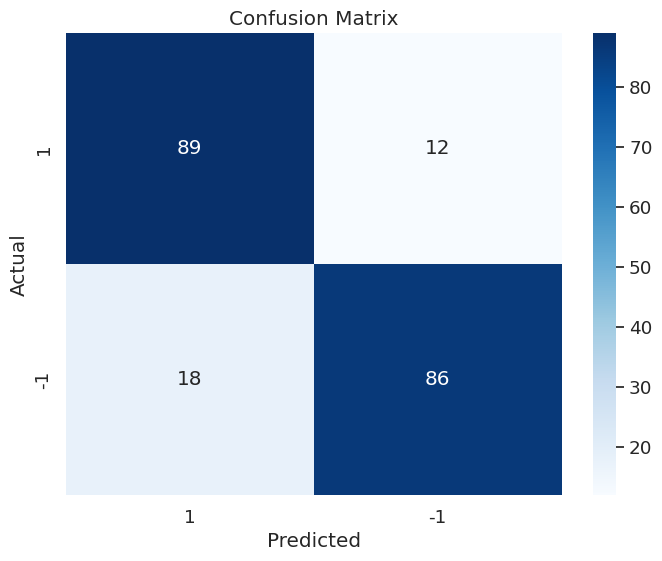

In [48]:
# TODO
labels = [1, -1]
matrix = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(matrix, labels)

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [49]:
print(recall_score(matrix))

0.8540555978674791


In [50]:
print(precision_score(matrix))

0.8546633606713714


In [172]:
print(f1_score(matrix))

0.8275715182705895


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.:


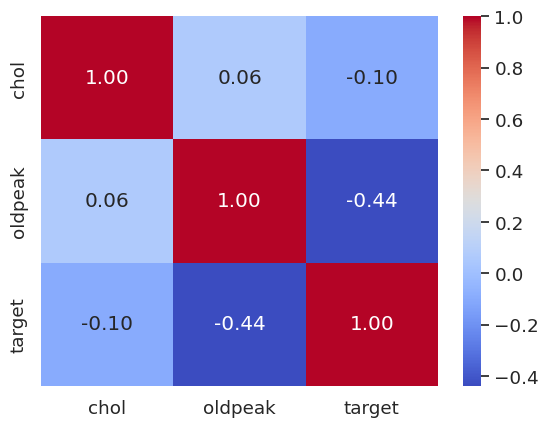

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[['chol', 'oldpeak', 'target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


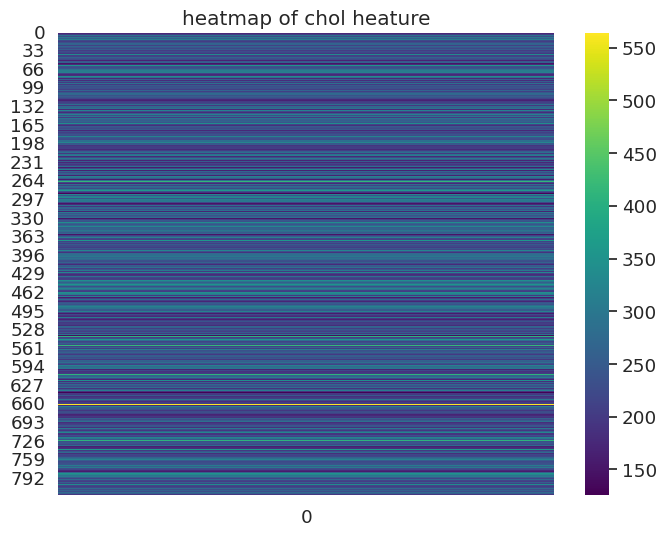

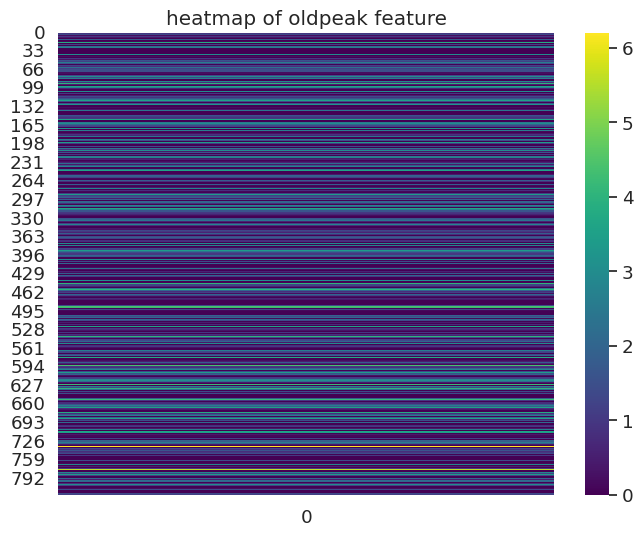

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# heatmap for the chol feature
plt.figure(figsize=(8, 6))
sns.heatmap(X_train[:, 10].reshape(-1, 1), cmap='viridis')
plt.title('heatmap of chol heature')
plt.show()

# heatmap for the oldpeak feature
plt.figure(figsize=(8, 6))
sns.heatmap(X_train[:, 12].reshape(-1, 1), cmap='viridis')
plt.title('heatmap of oldpeak feature')
plt.show()


Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [57]:
# TODO
X_train_without_chol = np.delete(X_train, 10, axis=1)
X_val_without_chol = np.delete(X_val, 10, axis=1)

mixed_data_nb.fit(X_train_without_chol, y_train)
predictions_without_chol = mixed_data_nb.predict(X_val_without_chol).flatten()

print("Accuracy without Chol:", accuracy_score(y_val, predictions_without_chol))

Accuracy without Chol: 0.8634146341463415


Remove oldpeak and test model

In [58]:
# TODO
X_train_without_oldpeak = np.delete(X_train, 12, axis=1)
X_val_without_oldpeak = np.delete(X_val, 12, axis=1)

mixed_data_nb.fit(X_train_without_oldpeak, y_train)
predictions_without_oldpeak = mixed_data_nb.predict(X_val_without_oldpeak).flatten()

print("Accuracy without oldpeak:", accuracy_score(y_val, predictions_without_oldpeak))

Accuracy without oldpeak: 0.8390243902439024


Comparison

**Answer:** As you can see, removing chol column increases the accuracy and removing oldpeak column decreases accuracy. It seems oldpeak is more important because when deleting this column, accuracy is changed a little more than when removing Chol column but I can not say that confidentally. In general removing one column may increase or decrease the accuracy of our model.

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer: Each time running the models, the results are changing. But in general naive bayes for better a little. I think that is because perceptron is a linear threshold function and works well when classes are linearly separabale but naive bayes makes the assumption that all features are independent (hence the term naive). It predicts the most likely class by using Bayesian probability, for each class multiplying the class prior with the the probability of the input given the class.

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [176]:
df = pd.read_csv("1.csv")
df['target'].replace(0, -1, inplace=True) # for this part this is not important, I do this for plotting confusion matrix

### Find the distribution


Find the number of samples from each target label.

In [177]:
# TODO
print(df['target'].value_counts())

-1    499
 1    226
Name: target, dtype: int64


### Split data

In [178]:
def split_data(df):
    X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
    y = df.loc[:, "target"].to_numpy()

    split_ratio = 0.8
    num_samples = X.shape[0]
    num_train_samples = int(split_ratio * num_samples)
    num_val_samples = num_samples - num_train_samples

    indices = np.random.permutation(num_samples)

    train_indices = indices[:num_train_samples]
    val_indices = indices[num_train_samples:]

    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]

    return X_train, y_train, X_val, y_val

In [179]:
# TODO

X_train, y_train, X_val, y_val = split_data(df)

### Train model and make predictions

In [180]:
# TODO
mixed_data_nb = MixedDataNB()
mixed_data_nb.fit(X_train, y_train)
predictions = mixed_data_nb.predict(X_val)
print("Accuracy score is: ", accuracy_score(y_val, predictions))

Accuracy score is:  86.62068965517241


### Plot confusion matrix

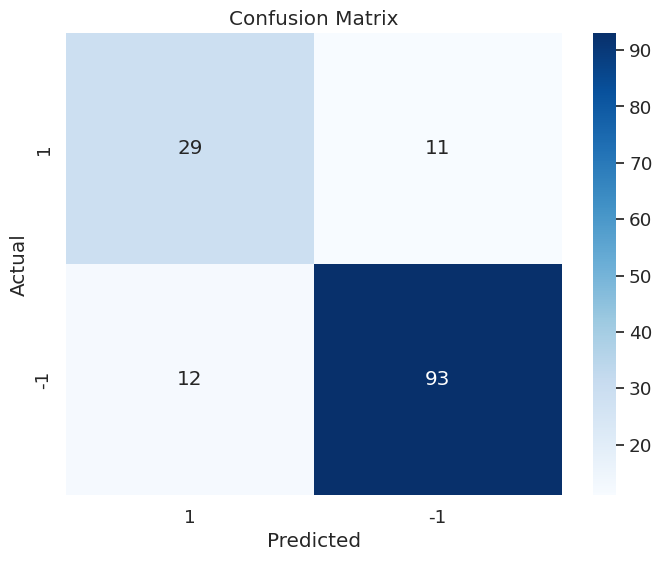

In [181]:
# TODO
labels = [1, -1]
matrix = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(matrix, labels)

### Calculate metrics

In [182]:
# TODO
print(recall_score(matrix))
print(precision_score(matrix))
print(f1_score(matrix))

0.8053571428571429
0.8007739212007505
0.803058992736724


## Second dataset

### Load data

In [183]:
df = pd.read_csv("2.csv")
df['target'].replace(0, -1, inplace=True) # for this part this is not important, I do this for plotting confusion matrix

### Find the distribution


Find the number of samples from each target label.

In [184]:
# TODO
print(df['target'].value_counts())

-1    499
 1    126
Name: target, dtype: int64


### Split data

In [185]:
# TODO
X_train, y_train, X_val, y_val = split_data(df)

### Train model and make predictions

In [186]:
# TODO
mixed_data_nb = MixedDataNB()
mixed_data_nb.fit(X_train, y_train)
predictions = mixed_data_nb.predict(X_val)
print("Accuracy score is: ", accuracy_score(y_val, predictions))

Accuracy score is:  80.056


### Plot confusion matrix

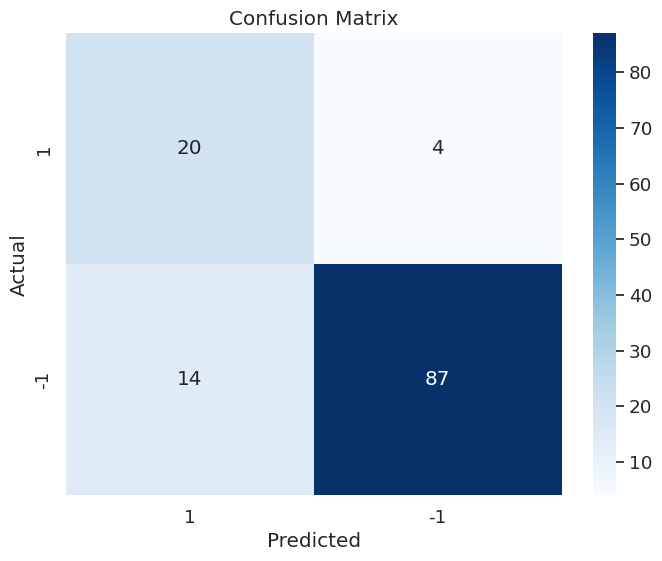

In [187]:
# TODO
labels = [1, -1]
matrix = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(matrix, labels)

### Calculate metrics

In [188]:
# TODO
print(recall_score(matrix))
print(precision_score(matrix))
print(f1_score(matrix))

0.8473597359735974
0.7721396250808016
0.8080028243015073


## Third dataset

### Load data

In [189]:
df = pd.read_csv("3.csv")
df['target'].replace(0, -1, inplace=True) # for this part this is not important, I do this for plotting confusion matrix

### Find the distribution


Find the number of samples from each target label.

In [190]:
# TODO
print(df['target'].value_counts())

-1    499
 1     26
Name: target, dtype: int64


### Split data

In [191]:
# TODO
X_train, y_train, X_val, y_val = split_data(df)

### Train model and make predictions

In [192]:
# TODO
mixed_data_nb = MixedDataNB()
mixed_data_nb.fit(X_train, y_train)
predictions = mixed_data_nb.predict(X_val)
print("Accuracy score is: ", accuracy_score(y_val, predictions))

Accuracy score is:  91.76190476190476


### Plot confusion matrix

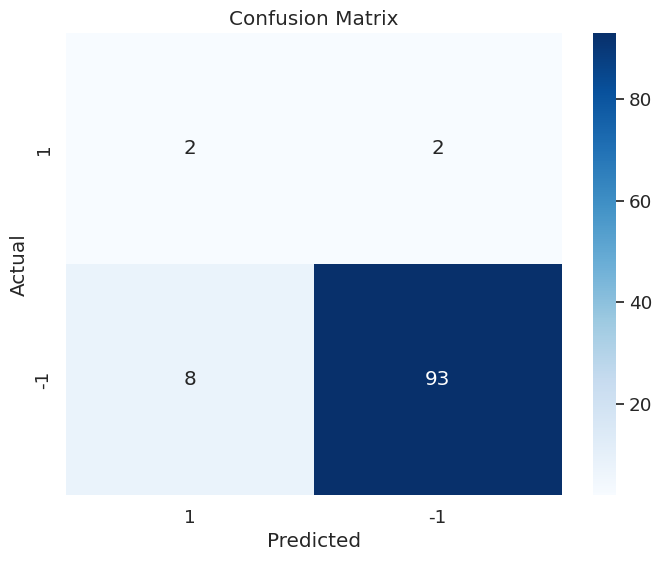

In [193]:
# TODO
labels = [1, -1]
matrix = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(matrix, labels)

### Calculate metrics

In [194]:
# TODO
print(recall_score(matrix))
print(precision_score(matrix))
print(f1_score(matrix))

0.7103960396039604
0.5894736842105264
0.6443103690192227


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:** F1 score is more appropriate, because it considers each class results but acuracy do not consider this (if all predicts be the major class, accuracy is high but F1 is low). and as you can see in the results, when datasets are became more imbalanced, the distance between accuracy and f1 score are bocame higher and higher.